---
# **Table of Contents**
---

**1.** [**Introduction**](#Section1)<br>
**2.** [**Problem Statement**](#Section2)<br>
**3.** [**Importing Libraries**](#Section3)<br>


**4.** [**Data Acquisition & Description**](#Section4)<br>
  - **4.1** [**Data Description**](#Section41)
  - **4.2** [**Data Information**](#Section42)

**5.** [**Data Pre-processing**](#Section5)<br>
  - **5.1** [**Handling of Redundant Data**](#Section51)
  - **5.2** [**Handling of Inconsistent and Missing Data**](#Section52)
  - **5.3** [**Reviewing Data**](#Section53)

**6.** [**Exploratory Data Analysis**](#Section6)<br>
  - **6.1** [**What is the most common Engine Type?**](#Section61)
  - **6.2** [**What is the ratio of the numbers of models produced by different companies?**](#Section62)
  - **6.3** [**How Gross Weight affects Cruising Speed**](#Section63)
  - **6.4** [**How Gross Weight affects the dimensions [Length, Height, Wingspan] of the aerplane**](#Section64)
  - **6.5** [**How Gross Weight affects the All eng service ceiling of the aerplane**](#Section65)
  
**7.** [**Summarization**](#Section7)<br>

---
<a name = Section1></a>
# **1. Introduction**
---

- The aeroplane is a great modem marvel. 
- It is the fastest means of transport, in a way it has shrunk the globe
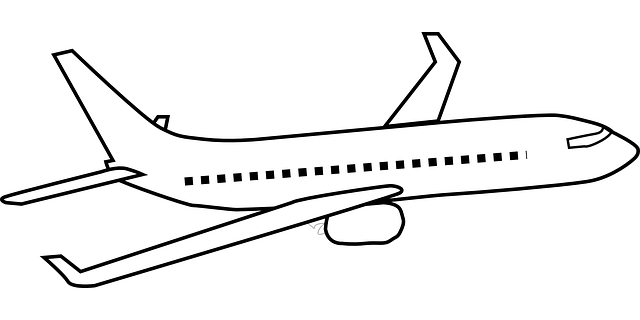
- For an aeroplane to function it is **essential** for its **engine** to meet certain requirement
- These requirements can **change** depending on the **use** of the aerplane, example: A smaller plane will require a less powerful engine 

---
<a name = Section2></a>
# **2. Problem Statement**
---


---
<a name = Section3></a>
# **3. Importing Libraries**
---

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

---
<a name = Section4></a>
# **4. Data Acquisition & Description**
---

**Disclaimer:** This dataset is under the license of Informa Markets. I'm not the owner. It can be accessed here: https://aircraftbluebook.com/Tools/ABB/ShowSpecifications.do

Features:

| Id | Features | Description |Units|
| :-- | :--| :--| :--|
|01|**Model**|Airplane's name.|None|
|02|**Company**|Company's name.|None|
|03|**Engine Type**|Engine type used in the airplane.|None|
|04|**HP or lbs thr ea engine**|Shaft Power or Thrust for International Standard Atmosphere (ISA).|HP or lbf|
|05|**Max speed Knots**|Airplane's maximum speed.|Knot or Mach|
|06|**Rcmnd cruise Knots**|Airplane's High cruise speed.|Knot|
|07|**Stall Knots dirty**|Airplane's stall speed on "dirty" configuration (flaps out, gear down, etc.).|Knot|
|08|**Fuel gal/lbs:**|: Airplane's fuel capacity.|gal or lb|
|09|**All eng service ceiling**|Airplane's maximum density-altitude with all engines working.| ft (as density-altitude)|
|10|**Eng out service ceiling**|Airplane's maximum density-altitude with one engine working.|ft (as density-altitude)|
|11|**All eng rate of climb**|: Airplane's rate of climb with all engines working.|ft/min|
|12|**Eng out rate of climb**|Airplane's rate of climb with one engine working.|ft/min|
|13|**Takeoff over 50ft**|Airplane's climb speed during normal take-off for 50 ft obstacle.|ft/min|
|14|**Takeoff ground run**|Airplane's takeoff ground run.|ft|
|15|**Landing over 50ft**|Airplane's descent speed during normal landing for 50 ft obstacle.|ft/min|
|16|**Landing ground run**|Airplane's landing ground run.|ft|
|17|**Gross weight lbs**|Airplane's gross weight (a.k.a all-up weight).|lb|
|18|**Empty weight lbs**|Airplane's gross weight (a.k.a manufacturer's empty weight ).|lb|
|19|**Length ft/in:**|Airplane's length.|ft + in.|
|20|**Height ft/in**|Airplane's height.|ft + in.|
|21|**Wingspan ft/in**|Airplane's wingspan.|ft + in.|
|22|**Range N.M.**|Airplane's range.|N.m. (Nautical miles).|

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/Tarran-Sidhaarth/Data-Science-Projects/main/Data%20Sheets/Aiplane_BlueBook.csv")
print("Data Shape = ",data.shape)
data.head()

Data Shape =  (861, 22)


,Model,Company,Engine Type,HP or lbs thr ea engine,Max speed Knots,Rcmnd cruise Knots,Stall Knots dirty,Fuel gal/lbs,All eng service ceiling,Eng out service ceiling,...,Takeoff over 50ft,Takeoff ground run,Landing over 50ft,Landing ground roll,Gross weight lbs,Empty weight lbs,Length ft/in,Height ft/in,Wing span ft/in,Range N.M.
0,15 AC Sedan,Aeronca,Piston,145,104,91,46,36.0,13000.0,NaN,...,900.0,NaN,1300.0,NaN,2050,1180,25/3,10/3,37/5,370
1,11 CC Super Chief,Aeronca,Piston,85,89,83,44,15.0,12300.0,NaN,...,720.0,NaN,800.0,NaN,1350,820,20/7,8/9,36/1,190
2,7 CCM Champ,Aeronca,Piston,90,90,78,37,19.0,16000.0,NaN,...,475.0,NaN,850.0,NaN,1300,810,21/5,8/7,35/0,210
3,7 DC Champ,Aeronca,Piston,85,88,78,37,19.0,13000.0,NaN,...,500.0,NaN,850.0,NaN,1300,800,21/5,8/7,35/0,210
4,7 AC Champ,Aeronca,Piston,65,83,74,33,14.0,12500.0,NaN,...,632.0,NaN,885.0,NaN,1220,740,21/5,8/9,35/0,175


<a name = Section41></a>
### **4.1 Data Description**

- In this section we will get **information about the data** and see some observations.

In [3]:
data.describe()

,Fuel gal/lbs,All eng service ceiling,Takeoff over 50ft,Takeoff ground run,Landing over 50ft,Landing ground roll
count,807.000000,780.000000,712.000000,691.000000,712.000000,660.000000
mean,2511.824040,25241.461538,1982.808989,1468.267728,1680.217697,991.928788
std,7005.146487,11357.745561,1141.400284,1956.443130,709.091377,680.911181
min,9.000000,850.000000,350.000000,125.000000,300.000000,200.000000
25%,50.000000,16287.500000,1273.750000,800.000000,1211.250000,590.000000
50%,94.000000,21200.000000,1650.000000,1005.000000,1500.000000,737.000000
75%,384.000000,30800.000000,2200.000000,1451.500000,2076.000000,1140.000000
max,48217.000000,51000.000000,6400.000000,42222.000000,4850.000000,4702.000000


**Observations:**

- The **average fuel** of the aerplane is found to be **2511.824040** and it seems **reasonable** however the maximum seems a little high, needs to be reviewd.

- The **All eng service ceiling** of the aerplane is found to be **25241.461538** and it seems **reasonable** considerg the **25%** **50%** and **75%**

- Similar Conclusions can be drawn for **Takeoff over 50ft**, **Takeoff ground run**, **Landing over 50ft**, **Landing ground roll**

In [4]:
data[data['Fuel gal/lbs']>30000]

,Model,Company,Engine Type,HP or lbs thr ea engine,Max speed Knots,Rcmnd cruise Knots,Stall Knots dirty,Fuel gal/lbs,All eng service ceiling,Eng out service ceiling,...,Takeoff over 50ft,Takeoff ground run,Landing over 50ft,Landing ground roll,Gross weight lbs,Empty weight lbs,Length ft/in,Height ft/in,Wing span ft/in,Range N.M.
177,Global 7500,Bombardier Aerospace Business Aircraft,Jet,18920,.925 Mach,.85 Mach,NaN,47450.0,51000.0,25000,...,NaN,5760.0,NaN,2237.0,114850,61700,111,27,104,7700
178,Global 6500,Bombardier Aerospace Business Aircraft,Jet,15125,.90 Mach,.85 Mach,NaN,45050.0,51000.0,20500,...,NaN,6145.0,NaN,2236.0,99500,52230,99/5,25/6,94,6600
179,Global 5500,Bombardier Aerospace Business Aircraft,Jet,15125,.90 Mach,.85 Mach,NaN,39250.0,51000.0,20600,...,NaN,5340.0,NaN,2207.0,92500,50861,96/10,25/6,94,5900
180,Global Express XRS,Bombardier Aerospace Business Aircraft,Jet,14750,.89 Mach,.85 Mach,NaN,44975.0,51000.0,18000,...,NaN,6190.0,NaN,2670.0,98000,51200,99/5,25/6,94/0,6190
183,Global 6000,Bombardier Aerospace Business Aircraft,Jet,14750,.89 Mach,.85 Mach,NaN,45050.0,51000.0,NaN,...,NaN,6476.0,NaN,2670.0,99750,52230,99/5,25/6,94/0,6000
185,Global 5000,Bombardier Aerospace Business Aircraft,Jet,14750,.89 Mach,.85 Mach,NaN,36000.0,51000.0,20600,...,NaN,5000.0,NaN,2670.0,98000,50830,96/10,25/6,94/0,4800
443,Falcon 8X,Dassault Falcon Jet,Jet,6722,.90 Mach,459,NaN,34900.0,51000.0,NaN,...,NaN,5880.0,NaN,2150.0,73000,41000,80/3,26/1,86/3,6450
444,Falcon 7X,Dassault Falcon Jet,Jet,6402,.90 Mach,370,NaN,31940.0,51000.0,NaN,...,NaN,5710.0,NaN,2070.0,70000,41000,76/7,25/7,86,5950
445,Lineage 1000,Dassault Falcon Jet,Jet,18500,.82 Mach,472,NaN,48217.0,41000.0,NaN,...,NaN,6076.0,NaN,2450.0,120152,70841,118/11,33/9,94/3,4600
481,Lineage 1000,Embraer Aircraft - Empresa Brasileira,Jet,18500,.82 Mach,452,NaN,48217.0,41000.0,NaN,...,NaN,6076.0,NaN,3402.0,120152,70841,118/11,33/9,94/3,4592


**Observations:**
- As we can see from the above, the rows with **'Fuel gal/lbs'>30000** is shown
- Since there are multiple values the data can be considered **valid.**

<a name = Section42></a>
### **4.2 Data Information**

- In this section we will see the **information about the types of features**.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 861 entries, 0 to 860
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Model                    861 non-null    object 
 1   Company                  861 non-null    object 
 2   Engine Type              834 non-null    object 
 3   HP or lbs thr ea engine  834 non-null    object 
 4   Max speed Knots          791 non-null    object 
 5   Rcmnd cruise Knots       811 non-null    object 
 6   Stall Knots dirty        735 non-null    object 
 7   Fuel gal/lbs             807 non-null    float64
 8   All eng service ceiling  780 non-null    float64
 9   Eng out service ceiling  332 non-null    object 
 10  All eng rate of climb    752 non-null    object 
 11  Eng out rate of climb    358 non-null    object 
 12  Takeoff over 50ft        712 non-null    float64
 13  Takeoff ground run       691 non-null    float64
 14  Landing over 50ft        7

**Observations:**

- At high level, we can observe that there are **missing data** in our dataset.

- The **HP or lbs thr ea engine, Max speed Knots, Rcmnd cruise Knots, Stall Knots dirty, data type, Eng out service ceiling, All eng rate of climb, Eng out rate of climb, Gross weight lbs, Empty weight lbs, Length ft/in, Height ft/in, Wing span ft/in, Range N.M.** is found to have <font color=red>inconsistent data type</font> requires rectification.

<a name = Section5></a>

---
# **5. Data Pre-Processing**
---

<a name = Section51></a>
### **5.1 Handling of Redundant Data**

- In this section, we will identify redundant data and remove them so while doing further analysis it reduces the processing power.

In [6]:
ar = data.Model.unique()
print(len(ar)) # number of unique values of models since there are total of 861 rows and only 858 unique models, that
               # must mean that some models are repeated

858


In [7]:
duprow = data[data.duplicated('Model')]
duprow # finding the duplicated Model in the dataframe

,Model,Company,Engine Type,HP or lbs thr ea engine,Max speed Knots,Rcmnd cruise Knots,Stall Knots dirty,Fuel gal/lbs,All eng service ceiling,Eng out service ceiling,...,Takeoff over 50ft,Takeoff ground run,Landing over 50ft,Landing ground roll,Gross weight lbs,Empty weight lbs,Length ft/in,Height ft/in,Wing span ft/in,Range N.M.
65,AT-602,Beechcraft (Hawker Beechcraft),Propjet,1050,158,126,52,216.0,8000.0,NaN,...,NaN,1830.0,NaN,NaN,12500,5829,33/6,11,56,600
481,Lineage 1000,Embraer Aircraft - Empresa Brasileira,Jet,18500,.82 Mach,452,NaN,48217.0,41000.0,NaN,...,NaN,6076.0,NaN,3402.0,120152,70841,118/11,33/9,94/3,4592
514,G500,Gulfstream Aerospace,Jet,15385,.885 Mach,.85 Mach,NaN,34939.0,51000.0,27700,...,NaN,5150.0,NaN,2770.0,85100,47600,96/5,25/10,93/6,58000


In [8]:
data = data.drop(labels=[65,481,514], axis=0) # Dropped Duplicated models

In [9]:
df = data[data['Engine Type'].isnull() == True]
lst_index_na = list(df.index.values)
data = data.drop(labels=lst_index_na, axis=0) # Dropped empty engine types as it is not required 

<a name = Section52></a>
### **5.2 Handling of Inconsistent and Missing Data**

- In this section, we will **identify inconsistency** in data and and then **take appropriate measures**.

- Previously, we observed that **majority of colums** feature was **incorrectly indentified** as Object, so, we will rectify it.


In [10]:
lst = data.columns.tolist()
del lst[0:3]
print(lst)

['HP or lbs thr ea engine', 'Max speed Knots', 'Rcmnd cruise Knots', 'Stall Knots dirty', 'Fuel gal/lbs', 'All eng service ceiling', 'Eng out service ceiling', 'All eng rate of climb', 'Eng out rate of climb', 'Takeoff over 50ft', 'Takeoff ground run', 'Landing over 50ft', 'Landing ground roll', 'Gross weight lbs', 'Empty weight lbs', 'Length ft/in', 'Height ft/in', 'Wing span ft/in', 'Range N.M.']


**Note:** Got a list of all columns that are suppossed to be numerical values
- To handle the inconsistency, going to define certain 
- **Functions:**

In [11]:
def digit_extracter(num):
    number=""
    if (type(num)!=float):
        for i in num:
            if(ord(i)>=48 and ord(i)<=57 or ord(i)==46):
                number+=i
        if(number == ''):
            return np.nan
        else:
            return float(number)
    else:
        return num

In [12]:
def Machtoknot(num):
    if(num<1):
        return num*666.739
    else:
        return num

In [13]:
def is_digit(num):
    co = 0
    for i in num:
        if(ord(i)>=48 and ord(i)<=57):
            co=co+1
    if(co == 0):
        return False
    else:
        return True

In [14]:
def digit_conver(num):
    number=""
    if (type(num)!=float):
        lst = num.split("/")
        if(len(lst)<2):
            return np.nan
        else:
            if(is_digit(lst[0])==False):
                return np.nan
            else:
                number = float(lst[0])+float(lst[1])*0.0833333
                return number
    else:
        return np.nan

**Before** the functions are applied, we shall create 3 additional colums **"Length ft","Height ft","Wing span ft"** these will have the unit as **only ft** and **not ft+in**

In [15]:
lst_ft = ["Length ft","Height ft","Wing span ft"]
for i in lst_ft:
    data[i] = data[i+"/in"].apply(digit_conver)
    data[i] = data[i].fillna(data[i].median())

In [16]:
for i in lst:
    data[i] = data[i].apply(digit_extracter)
    data[i] = data[i].apply(Machtoknot) 
    data[i] = data[i].fillna(data[i].median())
# Applyed data cleaning functions on the rows

In [17]:
def engine(name):
    if(name=='piston' or name=='Pistion'):
        return "Piston"
    else:
        return name

In [18]:
data['Engine Type'].unique()
lst_dup_engine= ['piston','Pistion']
data['Engine Type']=data['Engine Type'].apply(engine)
data['Engine Type'].unique()

array(['Piston', 'Propjet', 'Jet', 'TSIO 520', 'IO550', 'PT6A-35',
       'PT6A-21'], dtype=object)

In [19]:
data.head()

,Model,Company,Engine Type,HP or lbs thr ea engine,Max speed Knots,Rcmnd cruise Knots,Stall Knots dirty,Fuel gal/lbs,All eng service ceiling,Eng out service ceiling,...,Landing ground roll,Gross weight lbs,Empty weight lbs,Length ft/in,Height ft/in,Wing span ft/in,Range N.M.,Length ft,Height ft,Wing span ft
0,15 AC Sedan,Aeronca,Piston,145.0,104.0,91.0,46.0,36.0,13000.0,15800.0,...,750.0,2050.0,1180.0,253.0,103.0,375.0,370.0,25.250000,10.250000,37.416666
1,11 CC Super Chief,Aeronca,Piston,85.0,89.0,83.0,44.0,15.0,12300.0,15800.0,...,750.0,1350.0,820.0,207.0,89.0,361.0,190.0,20.583333,8.750000,36.083333
2,7 CCM Champ,Aeronca,Piston,90.0,90.0,78.0,37.0,19.0,16000.0,15800.0,...,750.0,1300.0,810.0,215.0,87.0,350.0,210.0,21.416667,8.583333,35.000000
3,7 DC Champ,Aeronca,Piston,85.0,88.0,78.0,37.0,19.0,13000.0,15800.0,...,750.0,1300.0,800.0,215.0,87.0,350.0,210.0,21.416667,8.583333,35.000000
4,7 AC Champ,Aeronca,Piston,65.0,83.0,74.0,33.0,14.0,12500.0,15800.0,...,750.0,1220.0,740.0,215.0,89.0,350.0,175.0,21.416667,8.750000,35.000000


**Note:** As we can see from the above displayed data frame, the **incosisntent** data and **null** values have been **cleaned.**

In [20]:
print(data.shape) # Added 3 columns by converting from feet+inches to just feet

(831, 25)


In [21]:
data = data.drop(labels = ['Length ft/in','Height ft/in','Wing span ft/in'],axis= 1)

<a name = Section53></a>
### **5.3 Reviewing Data**

- In this section, we will **review data** 


In [22]:
data.reset_index(drop = True,inplace = True)
data.info() # As we can see all the data has been cleaned

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 831 entries, 0 to 830
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Model                    831 non-null    object 
 1   Company                  831 non-null    object 
 2   Engine Type              831 non-null    object 
 3   HP or lbs thr ea engine  831 non-null    float64
 4   Max speed Knots          831 non-null    float64
 5   Rcmnd cruise Knots       831 non-null    float64
 6   Stall Knots dirty        831 non-null    float64
 7   Fuel gal/lbs             831 non-null    float64
 8   All eng service ceiling  831 non-null    float64
 9   Eng out service ceiling  831 non-null    float64
 10  All eng rate of climb    831 non-null    float64
 11  Eng out rate of climb    831 non-null    float64
 12  Takeoff over 50ft        831 non-null    float64
 13  Takeoff ground run       831 non-null    float64
 14  Landing over 50ft        8

<a name = Section6></a>

---
# **6. Exploratory Data Analysis**
---

In [23]:
data.head()

,Model,Company,Engine Type,HP or lbs thr ea engine,Max speed Knots,Rcmnd cruise Knots,Stall Knots dirty,Fuel gal/lbs,All eng service ceiling,Eng out service ceiling,...,Takeoff over 50ft,Takeoff ground run,Landing over 50ft,Landing ground roll,Gross weight lbs,Empty weight lbs,Range N.M.,Length ft,Height ft,Wing span ft
0,15 AC Sedan,Aeronca,Piston,145.0,104.0,91.0,46.0,36.0,13000.0,15800.0,...,900.0,1013.0,1300.0,750.0,2050.0,1180.0,370.0,25.250000,10.250000,37.416666
1,11 CC Super Chief,Aeronca,Piston,85.0,89.0,83.0,44.0,15.0,12300.0,15800.0,...,720.0,1013.0,800.0,750.0,1350.0,820.0,190.0,20.583333,8.750000,36.083333
2,7 CCM Champ,Aeronca,Piston,90.0,90.0,78.0,37.0,19.0,16000.0,15800.0,...,475.0,1013.0,850.0,750.0,1300.0,810.0,210.0,21.416667,8.583333,35.000000
3,7 DC Champ,Aeronca,Piston,85.0,88.0,78.0,37.0,19.0,13000.0,15800.0,...,500.0,1013.0,850.0,750.0,1300.0,800.0,210.0,21.416667,8.583333,35.000000
4,7 AC Champ,Aeronca,Piston,65.0,83.0,74.0,33.0,14.0,12500.0,15800.0,...,632.0,1013.0,885.0,750.0,1220.0,740.0,175.0,21.416667,8.750000,35.000000


Getting the **correlation** between the **numerical variables.**

<AxesSubplot:>

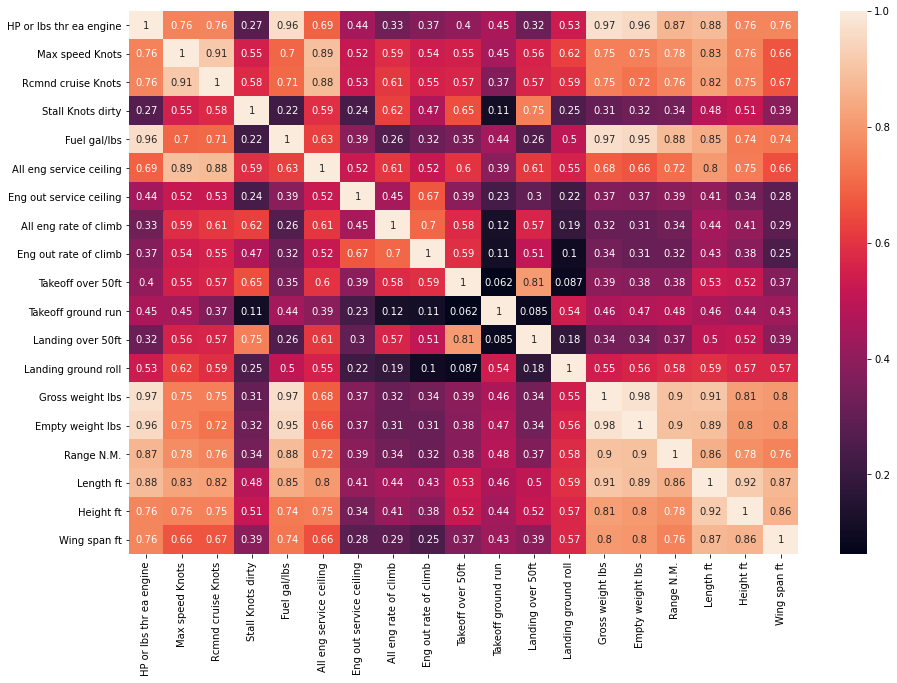

In [24]:
corr = data.corr()
plt.figure(figsize=[15,10])
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot= True)

<a name = Section61></a>
**<h4>Question:**What is the most common **Engine Type?**</h4>

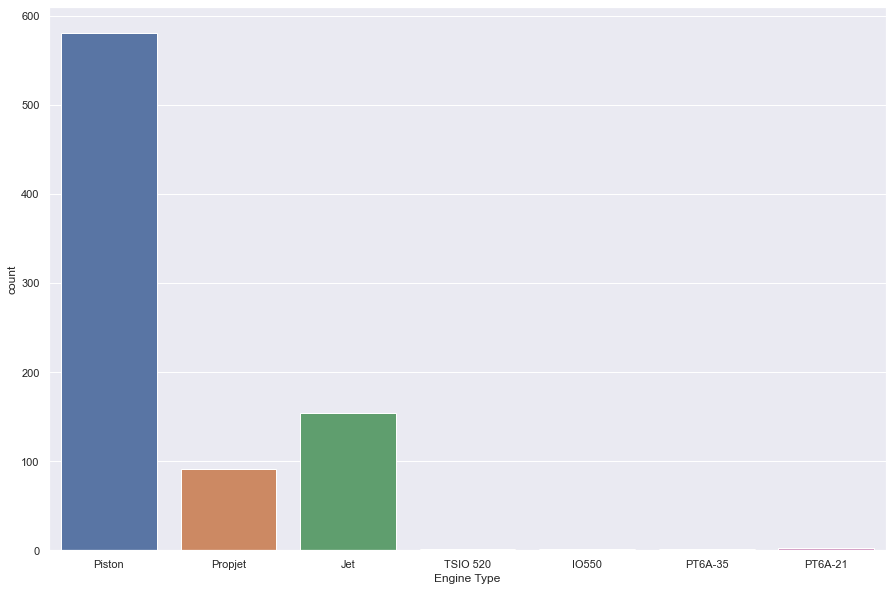

In [25]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=[15,10])
ax = sns.countplot(x="Engine Type", data=data)

<a name = Section62></a>
**<h4>Question:**What is the ratio of the numbers of **models produced** by different **companies** </h4>

In [26]:
series = data['Company'].value_counts(normalize= True)*100
series_sort=series[series>2]
series_sort_other=series[series<2].sum()
sr=pd.Series(series[series<2].sum())
sr.index = ["Other"]
company_series=series_sort.append(sr)

**Note:** if the percentage of units produced by a company is **less than 2%**, it is stored in **'Other'**

<AxesSubplot:ylabel='None'>

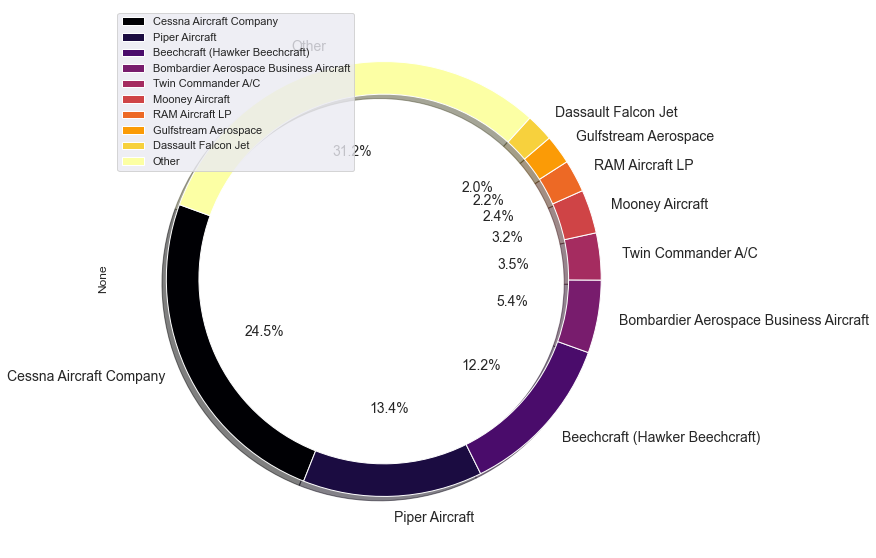

In [27]:
figure = plt.figure(figsize=[10, 10])
company_series.plot(kind='pie', fontsize=14, 
                                       autopct='%3.1f%%', wedgeprops=dict(width=0.15), 
                                       shadow=True, startangle=160, cmap='inferno', legend=True)
# % of company that manufactures the engines

<a name = Section63></a>
**<h4>Question:**How Gross Weight affects Cruising Speed </h4>
- Before we do this, we shall plot a hex graph to see the distribution of points

In [28]:
x= data['Gross weight lbs']
y= data['Rcmnd cruise Knots']
print(x.describe())
print("\n","------------x-------------------x-------------------------x")
print(y.describe())
x.tolist()
y.tolist()
print()

count       831.000000
mean       9820.199759
std       15492.608700
min         567.000000
25%        2800.000000
50%        4340.000000
75%        9437.000000
max      120152.000000
Name: Gross weight lbs, dtype: float64

 ------------x-------------------x-------------------------x
count    831.000000
mean     212.861581
std      118.767075
min        4.000000
25%      132.000000
50%      174.500000
75%      240.000000
max      566.728150
Name: Rcmnd cruise Knots, dtype: float64



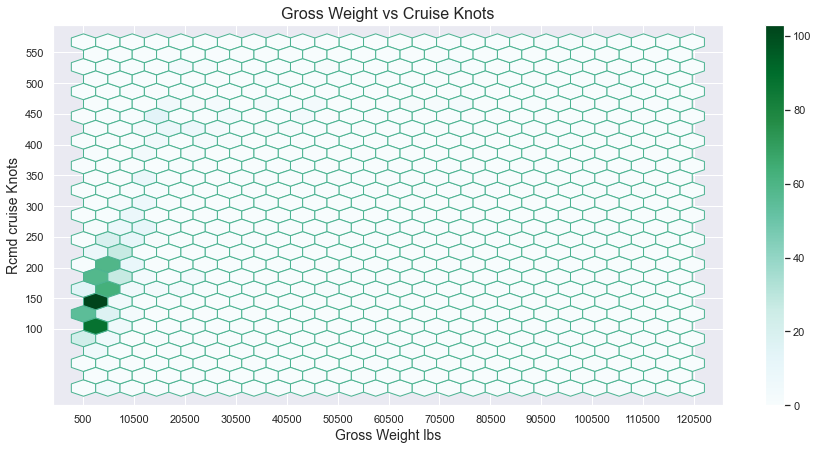

In [29]:
x1= data['Gross weight lbs']
y1= data['Rcmnd cruise Knots']
# plt.figure(figsize=[15,15])
data.plot.hexbin(x='Gross weight lbs', y='Rcmnd cruise Knots', color='#4CB391', figsize=[15, 7], gridsize=25, sharex=False)
# sns.jointplot(x=x, y=y, kind="hex", color="#4CB391")
plt.xticks(ticks=np.arange(500,121000,10000))
plt.yticks(ticks=np.arange(100,600,50))
plt.xlabel(xlabel='Gross Weight lbs', size=14)
plt.ylabel(ylabel='Rcmd cruise Knots', size=14)
plt.title(label='Gross Weight vs Cruise Knots', size=16)
plt.show()

From the above we can see there is an **abudance** of data points between **500 and 10500** so we shall plot a regression plot within that range.

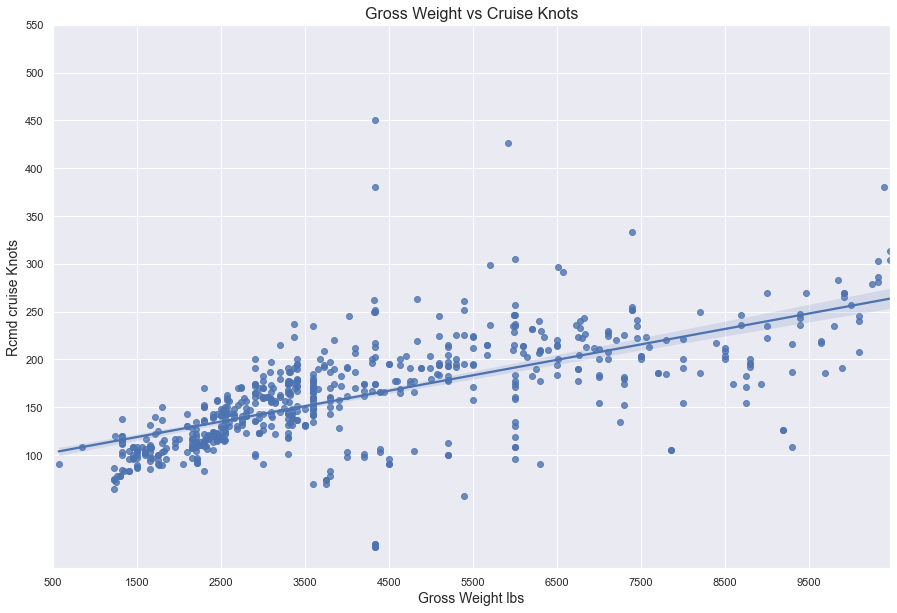

In [30]:
data_Gweight = data.loc[data['Gross weight lbs']<10500]
plt.figure(figsize=[15,10])
sns.regplot(x="Gross weight lbs", y="Rcmnd cruise Knots", data=data_Gweight)
plt.xticks(ticks=np.arange(500,10500,1000))
plt.yticks(ticks=np.arange(100,600,50))
plt.xlabel(xlabel='Gross Weight lbs', size=14)
plt.ylabel(ylabel='Rcmd cruise Knots', size=14)
plt.title(label='Gross Weight vs Cruise Knots', size=16)
plt.show()

**Conclusion:** As we can see the higher the gross weight, higher the cruising speed i.e, directly proportional.

In [31]:
print(data['Wing span ft'].describe())
print("--------------------x-------------------------")
print(data['Takeoff over 50ft'].describe())

count    831.000000
mean      40.971320
std       10.634415
min       16.000000
25%       35.458333
50%       36.916666
75%       44.375000
max       99.583333
Name: Wing span ft, dtype: float64
--------------------x-------------------------
count     831.000000
mean     1950.694946
std      1054.031268
min       350.000000
25%      1385.000000
50%      1667.500000
75%      2073.500000
max      6400.000000
Name: Takeoff over 50ft, dtype: float64


<a name = Section64></a>
**<h4>Question:**How Gross Weight affects the dimensions [Length, Height, Wingspan] of the aerplane</h4>

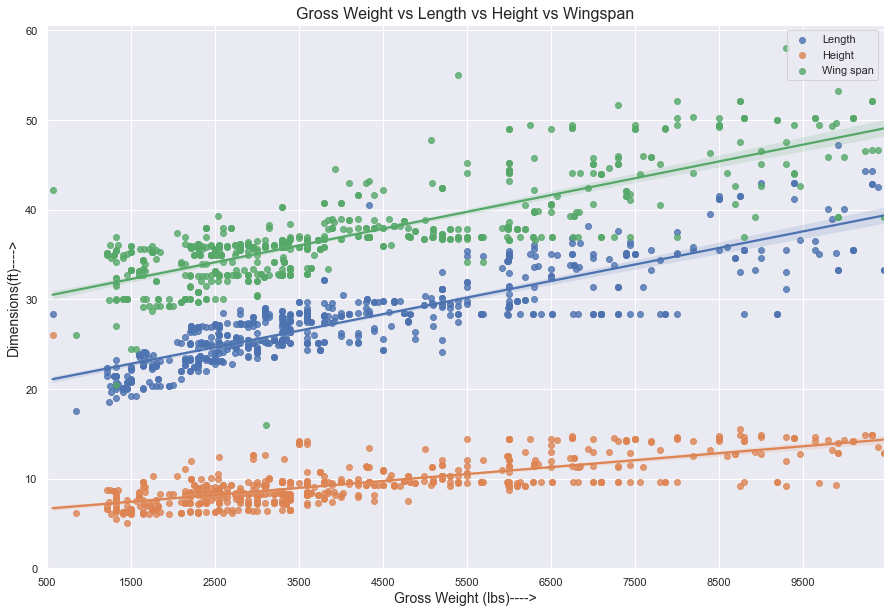

In [32]:
plt.figure(figsize=[15,10])
ax = sns.regplot(x="Gross weight lbs", y="Length ft", data=data_Gweight,label="Length")
ax1 =sns.regplot(x="Gross weight lbs", y="Height ft", data=data_Gweight,label="Height")
ax2 = sns.regplot(x="Gross weight lbs", y="Wing span ft", data=data_Gweight,label="Wing span")
ax.legend(loc="best")
plt.xticks(ticks=np.arange(500,10500,1000))
plt.yticks(ticks=np.arange(0,70,10))
plt.xlabel(xlabel='Gross Weight (lbs)---->', size=14)
plt.ylabel(ylabel='Dimensions(ft)---->', size=14)
plt.title(label='Gross Weight vs Length vs Height vs Wingspan', size=16)
plt.show()

**Conclusion:** As we can see the greater the gross weight, the greater is the dimensions of the engine as well as wing span

<a name = Section65></a>
**<h4>Question:**How Gross Weight affects the All eng service ceiling of the aerplane</h4>

In [33]:
print(data_Gweight['All eng service ceiling'].describe())
print("--------------------x-------------------------")
print(data_Gweight['Gross weight lbs'].describe())

count      644.000000
mean     20249.259317
std       6158.243043
min        850.000000
25%      15566.000000
50%      19700.000000
75%      25000.000000
max      45000.000000
Name: All eng service ceiling, dtype: float64
--------------------x-------------------------
count      644.000000
mean      4166.076087
std       2245.151897
min        567.000000
25%       2518.750000
50%       3400.000000
75%       5500.000000
max      10470.000000
Name: Gross weight lbs, dtype: float64


**Note:** The min of All eng service ceiling seems **unusually** low, it may be an **outlier**

In [34]:
arr = data['All eng service ceiling'].unique()
arr.sort()
print(arr)

[  850.  6500.  7000.  7700.  7800.  8000.  8500.  8700.  9500. 10250.
 10700. 10950. 11000. 11100. 11300. 11500. 11650. 11870. 12000. 12300.
 12500. 12600. 12650. 12700. 12750. 12800. 12900. 13000. 13100. 13200.
 13236. 13300. 13500. 13550. 13600. 13750. 13800. 13900. 14000. 14100.
 14150. 14200. 14300. 14342. 14350. 14500. 14600. 14700. 14800. 14850.
 14900. 15000. 15050. 15100. 15300. 15385. 15400. 15500. 15588. 15600.
 15700. 15750. 15800. 15900. 16000. 16100. 16200. 16250. 16300. 16400.
 16500. 16600. 16700. 16800. 16900. 17000. 17100. 17200. 17250. 17300.
 17400. 17500. 17600. 17700. 17800. 17858. 17900. 18000. 18100. 18200.
 18300. 18400. 18500. 18600. 18800. 18900. 19000. 19100. 19200. 19300.
 19400. 19500. 19600. 19650. 19700. 19750. 19800. 19900. 20000. 20100.
 20300. 20500. 20688. 20700. 20900. 21000. 21100. 21200. 21300. 21400.
 21500. 21900. 22000. 22200. 22500. 23000. 23500. 23700. 24000. 24200.
 24300. 24850. 25000. 25360. 25570. 25600. 25900. 26000. 26180. 26300.
 26500

**Conclusion:** 850 is an **outlier**

In [35]:
data_Gweight['All eng service ceiling']= data_Gweight['All eng service ceiling'].replace(850,data['All eng service ceiling'].median())

<ipython-input-35-5024a7e81a55>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_Gweight['All eng service ceiling']= data_Gweight['All eng service ceiling'].replace(850,data['All eng service ceiling'].median())


In [36]:
arr = data['All eng service ceiling'].unique()
arr.sort()
print(arr)

[  850.  6500.  7000.  7700.  7800.  8000.  8500.  8700.  9500. 10250.
 10700. 10950. 11000. 11100. 11300. 11500. 11650. 11870. 12000. 12300.
 12500. 12600. 12650. 12700. 12750. 12800. 12900. 13000. 13100. 13200.
 13236. 13300. 13500. 13550. 13600. 13750. 13800. 13900. 14000. 14100.
 14150. 14200. 14300. 14342. 14350. 14500. 14600. 14700. 14800. 14850.
 14900. 15000. 15050. 15100. 15300. 15385. 15400. 15500. 15588. 15600.
 15700. 15750. 15800. 15900. 16000. 16100. 16200. 16250. 16300. 16400.
 16500. 16600. 16700. 16800. 16900. 17000. 17100. 17200. 17250. 17300.
 17400. 17500. 17600. 17700. 17800. 17858. 17900. 18000. 18100. 18200.
 18300. 18400. 18500. 18600. 18800. 18900. 19000. 19100. 19200. 19300.
 19400. 19500. 19600. 19650. 19700. 19750. 19800. 19900. 20000. 20100.
 20300. 20500. 20688. 20700. 20900. 21000. 21100. 21200. 21300. 21400.
 21500. 21900. 22000. 22200. 22500. 23000. 23500. 23700. 24000. 24200.
 24300. 24850. 25000. 25360. 25570. 25600. 25900. 26000. 26180. 26300.
 26500

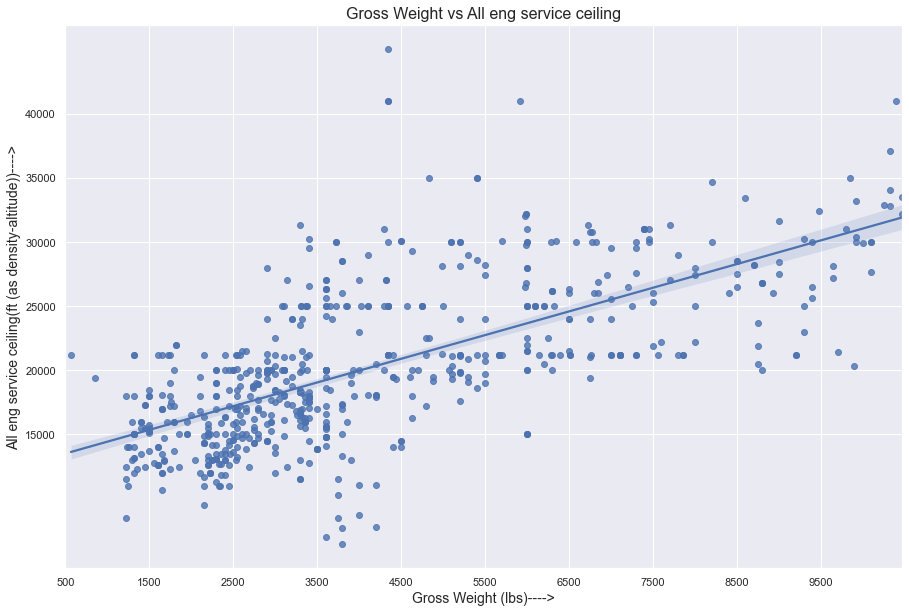

In [37]:
plt.figure(figsize=[15,10])
sns.regplot(x="Gross weight lbs", y="All eng service ceiling", data=data_Gweight)
plt.xticks(ticks=np.arange(500,10500,1000))
plt.yticks(ticks=np.arange(15000,45000,5000))
plt.xlabel(xlabel='Gross Weight (lbs)---->', size=14)
plt.ylabel(ylabel='All eng service ceiling(ft (as density-altitude))---->', size=14)
plt.title(label='Gross Weight vs All eng service ceiling', size=16)
plt.show()

<a name = Section7></a>

---
# **7. Summarization**
---

- **<h4>Conclusion</h4>**

  - This survey has **helped** us to **understand** the **criteria** of aerplane performance.

  - A total of **861 entries were recorded** 

  - From a **production point of view**, **Cessna Aircraft Company** was leading the market.
